## Imports

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


## Loading

In [48]:
%%time
df_train = pd.read_csv('~/Desktop/DMT/train_2_fixed.csv', index_col=0)
df_valid = pd.read_csv('~/Desktop/DMT/validation_2.csv', index_col=0)
df_test = pd.read_csv('~/Desktop/DMT/test_set_VU_DM.csv')

CPU times: user 27 s, sys: 7.29 s, total: 34.3 s
Wall time: 34.8 s


## Dimensionality rediction with PCA

In [3]:
cols = df_train.columns[27:51]
cols

Index(['comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate',
       'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv',
       'comp8_rate_percent_diff'],
      dtype='object')

In [23]:
X = df_train[cols].fillna(0)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278680 entries, 1 to 278686
Data columns (total 24 columns):
comp1_rate                 278680 non-null float64
comp1_inv                  278680 non-null float64
comp1_rate_percent_diff    278680 non-null float64
comp2_rate                 278680 non-null float64
comp2_inv                  278680 non-null float64
comp2_rate_percent_diff    278680 non-null float64
comp3_rate                 278680 non-null float64
comp3_inv                  278680 non-null float64
comp3_rate_percent_diff    278680 non-null float64
comp4_rate                 278680 non-null float64
comp4_inv                  278680 non-null float64
comp4_rate_percent_diff    278680 non-null float64
comp5_rate                 278680 non-null float64
comp5_inv                  278680 non-null float64
comp5_rate_percent_diff    278680 non-null float64
comp6_rate                 278680 non-null float64
comp6_inv                  278680 non-null float64
comp6_rate_percent_dif

In [24]:
model = PCA()
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
model.explained_variance_ratio_

array([9.07422373e-01, 6.05295579e-02, 3.00320304e-02, 1.26086658e-03,
       3.41754137e-04, 2.10918182e-04, 1.57038238e-04, 4.42946262e-05,
       3.44005662e-07, 1.84217175e-07, 1.14360109e-07, 9.78704428e-08,
       8.60328617e-08, 6.16968034e-08, 5.35199532e-08, 4.81624942e-08,
       4.29698869e-08, 3.16594534e-08, 2.95487217e-08, 2.36801080e-08,
       1.85476751e-08, 1.81860201e-08, 9.57731248e-09, 2.81968130e-09])

In [26]:
sns.set(
    style='whitegrid',
    palette='Set2',
    font_scale=1.4,
    rc={"figure.figsize": [10, 6]})


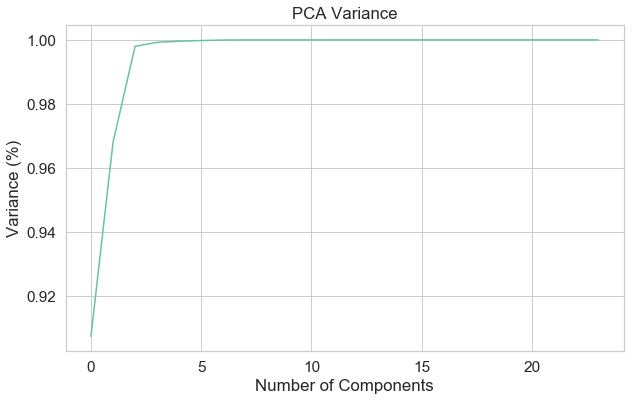

In [27]:
sns.lineplot(data=np.cumsum(model.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('PCA Variance')
plt.show()


In [28]:
model = PCA(.99)#n=3
model.fit(X)
X = pd.DataFrame(
    model.transform(X),
    columns=['PC1', 'PC2', 'PC3'],
    index=df_train.index)
X.head()


,PC1,PC2,PC3
1,-3.402822,-4.684602,-2.664463
2,-3.401969,-4.694467,7.189917
3,-3.402822,-4.684602,-2.664463
4,-3.402822,-4.684602,-2.664463
5,-3.402822,-4.684602,-2.664463


In [29]:
df_train.drop(cols, axis=1, inplace=True)
df_train = df_train.join(X)


In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278680 entries, 1 to 278686
Data columns (total 33 columns):
srch_id                        278680 non-null int64
date_time                      278680 non-null object
site_id                        278680 non-null int64
visitor_location_country_id    278680 non-null int64
visitor_hist_starrating        14484 non-null float64
visitor_hist_adr_usd           14542 non-null float64
prop_country_id                278680 non-null int64
prop_id                        278680 non-null int64
prop_starrating                278680 non-null int64
prop_review_score              278238 non-null float64
prop_brand_bool                278680 non-null int64
prop_location_score1           278680 non-null float64
prop_location_score2           228834 non-null float64
prop_log_historical_price      278680 non-null float64
position                       278680 non-null int64
price_usd                      278680 non-null float64
promotion_flag              

In [31]:
df_train.to_csv('~/Desktop/DMT/train_pc.csv')

## Transform validation set

transform validation set with PCA model previously fit on train with n=4

In [32]:
X = df_valid[cols].fillna(0)
X.info()

,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
3460672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3460673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0
3460674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3460675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0
3460676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X = pd.DataFrame(
    model.transform(X),
    columns=['PC1', 'PC2', 'PC3'],
    index=df_valid.index)
X.head()

,PC1,PC2,PC3
3460672,-3.402822,-4.684602,-2.664463
3460673,-3.401066,-4.648624,-2.614532
3460674,-3.402822,-4.684602,-2.664463
3460675,-3.402837,-4.680395,-2.664808
3460676,-3.402822,-4.684602,-2.664463


In [36]:
df_valid.drop(cols, axis=1, inplace=True)
df_valid = df_valid.join(X)


In [37]:
df_valid.to_csv('~/Desktop/DMT/valid_pc.csv')

## Transform test set

We transform the test set in the same fashion

In [49]:
X = df_test[cols].fillna(0)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959183 entries, 0 to 4959182
Data columns (total 24 columns):
comp1_rate                 float64
comp1_inv                  float64
comp1_rate_percent_diff    float64
comp2_rate                 float64
comp2_inv                  float64
comp2_rate_percent_diff    float64
comp3_rate                 float64
comp3_inv                  float64
comp3_rate_percent_diff    float64
comp4_rate                 float64
comp4_inv                  float64
comp4_rate_percent_diff    float64
comp5_rate                 float64
comp5_inv                  float64
comp5_rate_percent_diff    float64
comp6_rate                 float64
comp6_inv                  float64
comp6_rate_percent_diff    float64
comp7_rate                 float64
comp7_inv                  float64
comp7_rate_percent_diff    float64
comp8_rate                 float64
comp8_inv                  float64
comp8_rate_percent_diff    float64
dtypes: float64(24)
memory usage: 908.1 MB


In [50]:
X = pd.DataFrame(
    model.transform(X),
    columns=['PC1', 'PC2', 'PC3'],
    index=df_test.index)
X.head()

,PC1,PC2,PC3
0,-3.402822,-4.684602,-2.664463
1,-3.402822,-4.684602,-2.664463
2,-3.401897,-4.679150,-2.638461
3,-3.402822,-4.684602,-2.664463
4,-3.402822,-4.684602,-2.664463


In [51]:
df_test.drop(cols, axis=1, inplace=True)
df_test = df_test.join(X)

In [55]:
%%time
df_test.to_csv('~/Desktop/DMT/test_pc.csv')

CPU times: user 1min 58s, sys: 1.33 s, total: 2min
Wall time: 2min 1s
